# Step by Step OCR
This notebook contains all steps of OCR

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

/home/shadow43/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shadow43/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shadow43/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shadow43/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

Loading segmentation models...


Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/shadow43/Documents/handwriting-ocr/src/ocr/../../models/gap-clas/CNN-CG
INFO:tensorflow:Restoring parameters from /home/shadow43/Documents/handwriting-ocr/src/ocr/../../models/gap-clas/RNN/Bi-RNN-new


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

### Global Variables

In [13]:
IMG = '../data/pages/test4.jpg'    # 1, 2, 3
LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = '../models/char-clas/' + LANG + '/CharClassifier'
MODEL_LOC_CTC = '../models/word-clas/CTC/Classifier1'

## Load Trained Model

In [14]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

INFO:tensorflow:Restoring parameters from ../models/char-clas/en/CharClassifier
INFO:tensorflow:Restoring parameters from ../models/word-clas/CTC/Classifier1


## Load image

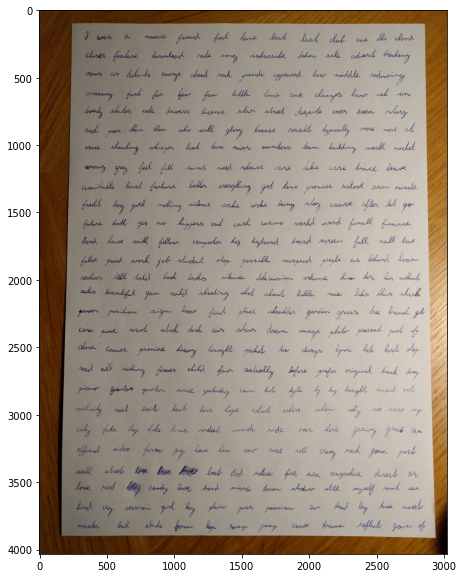

In [15]:
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

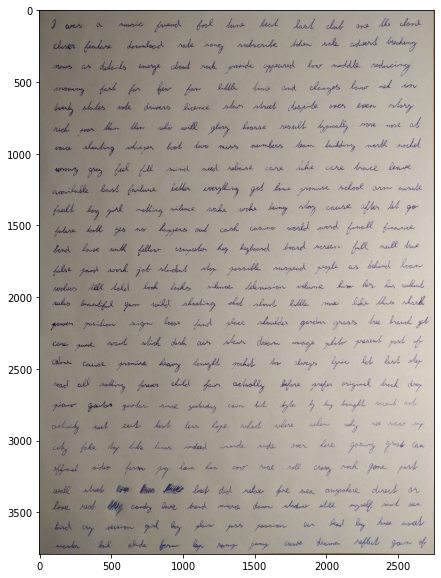

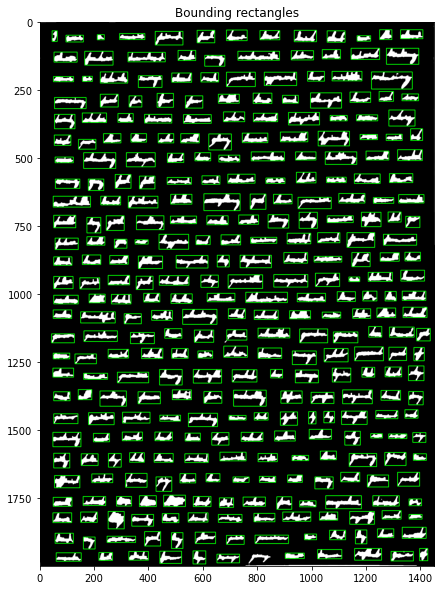

In [16]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

# Recognition Using Character + Separator Model

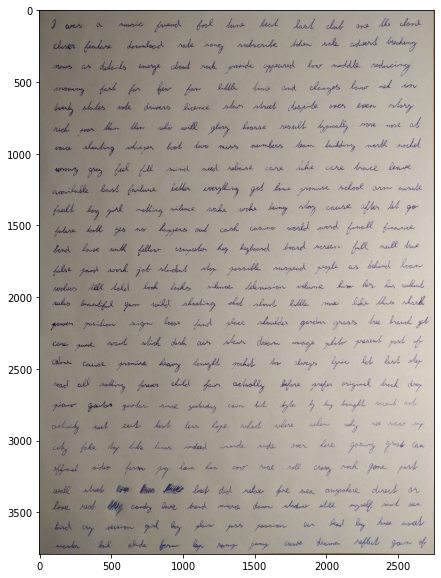

I upas a music friend fool tune beat last club one the clone
closer feakure downloact rale song subscrijbe token sale advert breakeng
news as details emerp about rock provide apYeared low middle reducing
pnoving fast far few fgn little time and changes lanp net in
toenty states oote drivers liance stm street despite over wen story
rich than then who will glory hoarse result typically sore nose at
poor
voice skouting rohisper boot two miss numbers team building north rochet
vvrong gy fed fill mincl need release ciare take care trace leave
amilable least failure better everything got home pmm school arm minute
fault bog girl nothing silmce wake woke beinvg stay cause after let v
future tooth yes no kappens out cash asino world npord finall finance
bond have with fellonr computer key keyboard board screen frll null true
fwlee pw work job strdont stop possible suspenct people us bekind loan
wolees tell tald look looks silence televesion volermee him ber his wdeout
rules beautiful gun wild 

In [17]:
def recognise(img):
    """Recognition using character model"""
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)

    # Separate letters
    img = cv2.copyMakeBorder(
        img,
        0, 0, 30, 30,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0])
    gaps = characters.segment(img, RNN=True)

    chars = []
    for i in range(len(gaps)-1):
        char = img[:, gaps[i]:gaps[i+1]]
        char, dim = letter_normalization(char, is_thresh=True, dim=True)
        # TODO Test different values
        if dim[0] > 4 and dim[1] > 4:
            chars.append(char.flatten())

    chars = np.array(chars)
    word = ''        
    if len(chars) != 0:
        pred = CHARACTER_MODEL.run(chars)                
        for c in pred:
            word += idx2char(c)

    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

# Recognition Using CTC Model

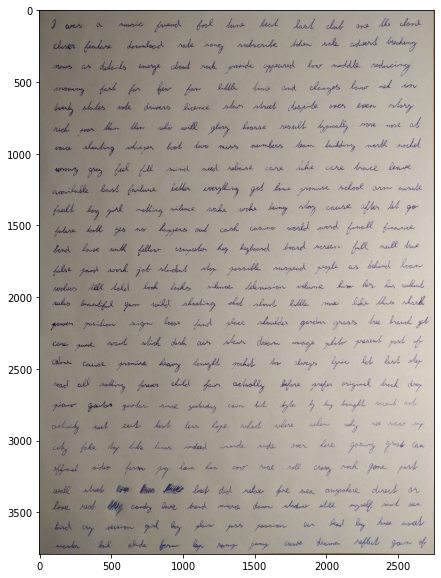

H vZr Z ltrhb eqhdmc annk stmd adZs kZrs bkta nmd sgd bknmd
bknrdq edZstqd cnvmkZZc qZsd rnmf rtarbqhad sngdm rZkd Zcudqs aqnjhmf
mdvr Zr cdsZhkr dmdqfd Zants qnbj oquhcd ZoodZqdc knv lhcckdq qdctbhmf
lnuhmf eZrs eZq edv eZq khsskd shm Zmc bgZmfdr kZm mds hm
sudmsx rsZsdr unsd cqhudqr khbdmbd rsZq rsqdds cdrohsd nudq dudm rsnqx
qhbg RsgZh sgdm vgn vhkk fknx gnZqrd qdrtks ohbZkkx rnqd lnrd Zs
onnq
unhbd rgZmshmf vghrodq anns svn lhrr mtladqr sdZl athkchmf lnqsg qnbjds
vqnmf fqZx addk ehkk lhmc mddc qdaZrd bZqd sgd btqd sqZbd kZud
ZuZhkZakd aZrs eZqktmd adssdq dudqfghmf fns gnld oqnlhrd rbgnng Zql lhmtsd
entks anx fhqk mZsjhmf rhkZmbd vZjd vnjd ahmf rsZx bZtrd Zesdq kds fn
etstqd snnsg xdr mn gZoodmr nts bZrg bZrhmn vnqkc vnqc ehlZkk ehqZmbd
anmc gZud vhsg adkknv bnlotsdq jdx jdfanZqc aZZqc rbqddm etkk vtkk sqtd
eZkrd oZhc vnqj ina rsdcms rsno onrrhakd rtrodmc odnokd tr adghmc knZm
vZkudr rdkk snkc knnj knnjr rhkdmbd cdkduhrhnm uZktld ghl gdq ghr vhsgnts
qtkdr adZmshetk ftq vhkc rgZbshmf

In [8]:
def recognise(img):
    """Recognising words using CTC Model."""
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i)
    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))